In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Load Data

In [2]:
df_benign = pd.read_csv('Data/CSV_benign.csv')
df_malware = pd.read_csv('Data/CSV_malware.csv')

/var/folders/l2/k0kzp4_94t124f1tz8_9bd9r0000gn/T/ipykernel_30079/956180555.py:1: DtypeWarning: Columns (9,10,12,13,17,18,20,21,24,25,27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benign = pd.read_csv('Data/CSV_benign.csv')


In [3]:
# Label data
df_benign['label'] = 0
df_malware['label'] = 1

Check if both csv files have the same features

In [4]:
#Check if the two dataset have the same columns
sorted(list(df_malware.columns)) == sorted(list(df_benign.columns))

True

Check for duplicates

In [5]:
len(df_benign[df_benign.duplicated()])

15522

In [6]:
len(df_malware[df_malware.duplicated()])

22

In [7]:
#Remove duplicates
df_benign = df_benign.drop_duplicates()
df_malware = df_malware.drop_duplicates()

In [8]:
print(len(df_benign))
print(len(df_malware))

478613
4977


In [9]:
#Concatenate datasets
df = pd.concat([df_benign, df_malware])
df_concat = df

In [10]:
df_concat

Country       ASN    TTL               IP  \
0         US   15169.0     46    172.217.1.174   
1        NaN       NaN    299              NaN   
2        NaN       NaN     38              NaN   
3         US   15169.0    299  172.217.164.228   
4        NaN       NaN     96              NaN   
...      ...       ...    ...              ...   
4994      DE   24940.0  14399   148.251.70.130   
4995      NL  204915.0   3599    145.14.145.85   
4996     NaN       NaN   3599              NaN   
4997      DE    8767.0   1799    62.245.182.18   
4998      DE    8767.0   1799    62.245.182.48   

                                        Domain    State Registrant_Name  \
0                               b'google.com.'       CA             NaN   
1                               b'google.com.'       CA             NaN   
2                           b'www.google.com.'      NaN             NaN   
3                           b'www.google.com.'      NaN             NaN   
4                             b'facebook.com.'       CA             NaN   
...                                        ...      ...             ...   
4994                  b'naveenmechanical.com.'      NaN             NaN   
4995  b'onlinefrepdfviewer.000webhostapp.com.'  Larnaka             NaN   
4996  b'onlinefrepdfviewer.000webhostapp.com.'  Larnaka             NaN   
4997                  b'stefanie-bolemant.de.'      NaN             NaN   
4998                        b'web.asamnet.de.'      NaN             NaN   

     Country.1   Creation_Date_Time hex_32  ...  \
0           US  1997-09-15 04:00:00      0  ...   
1           US  1997-09-15 04:00:00      0  ...   
2          NaN  1997-09-15 04:00:00      0  ...   
3          NaN                  NaN      0  ...   
4           US  1997-03-29 05:00:00      0  ...   
...        ...                  ...    ...  ...   
4994       NaN                  NaN      0  ...   
4995        CY  2016-05-11 13:34:12      0  ...   
4996        CY  2016-05-11 13:34:12      0  ...   
4997       NaN                  NaN      0  ...   
4998       NaN                  NaN      0  ...   

                                                 typos oc_8  \
0         [('google.com', 100), ('google.com.br', 95)]    0   
1         [('google.com', 100), ('google.com.br', 95)]    0   
2         [('google.com', 100), ('google.com.br', 95)]    0   
3         [('google.com', 100), ('google.com.br', 95)]    0   
4              [('facebook.com', 100), ('qq.com', 86)]    0   
...                                                ...  ...   
4994       [('facebook.com', 86), ('twitter.com', 86)]    0   
4995         [('twitter.com', 86), ('google.com', 86)]    0   
4996         [('twitter.com', 86), ('google.com', 86)]    0   
4997         [('google.de', 86), ('e-recht24.de', 86)]    0   
4998  [('gesetze-im-internet.de', 86), ('web.de', 86)]    0   

                                                  3gram  \
0                          ['goo', 'oog', 'ogl', 'gle']   
1                          ['goo', 'oog', 'ogl', 'gle']   
2                          ['goo', 'oog', 'ogl', 'gle']   
3                          ['goo', 'oog', 'ogl', 'gle']   
4            ['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']   
...                                                 ...   
4994  ['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'me...   
4995  ['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...   
4996  ['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...   
4997  ['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie...   
4998                ['asa', 'sam', 'amn', 'mne', 'net']   

                                      char_distribution  \
0     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
1     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...   
3     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...   
4     defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o...   
...                                                 ...   
4994  defau

Class Imbalance

In [11]:
labels = df_concat['label'].value_counts()
labels

label
0    478613
1      4977
Name: count, dtype: int64

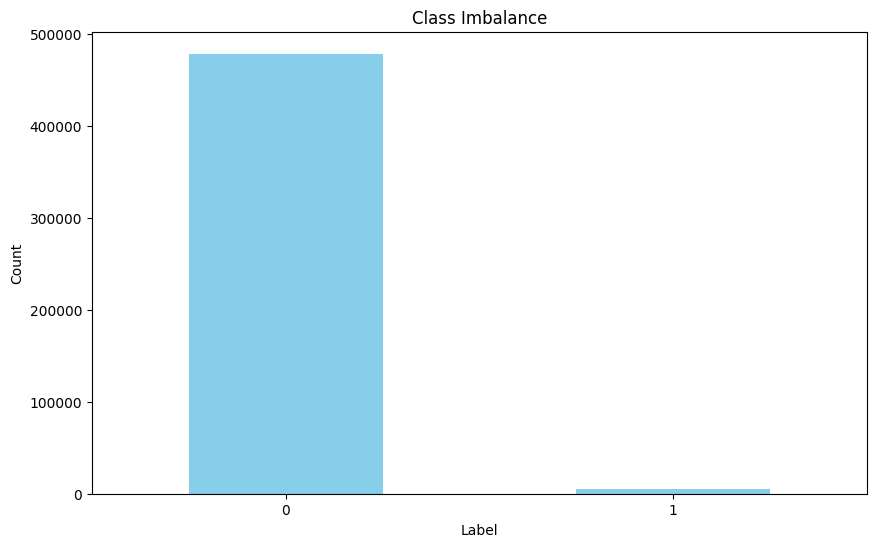

In [12]:
# Create a bar plot
plt.figure(figsize=(10, 6))
labels.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

## EDA

In [13]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483590 entries, 0 to 4998
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             377980 non-null  object 
 1   ASN                 378035 non-null  float64
 2   TTL                 483590 non-null  object 
 3   IP                  379255 non-null  object 
 4   Domain              483590 non-null  object 
 5   State               220137 non-null  object 
 6   Registrant_Name     13238 non-null   object 
 7   Country.1           256116 non-null  object 
 8   Creation_Date_Time  365670 non-null  object 
 9   hex_32              483479 non-null  object 
 10  hex_8               483590 non-null  object 
 11  Domain_Name         396583 non-null  object 
 12  Alexa_Rank          435204 non-null  object 
 13  subdomain           483574 non-null  object 
 14  Organization        203860 non-null  object 
 15  len                 483244 non-null  obje

In [14]:
# Data summarization function
def data_summary(data, ascending=False):
    
    summary = pd.DataFrame(data.isna().sum(), columns=['nan_count'])

    unique_val = []
    types_val = []
    zero_val = []

    for column in data.columns:
        unique = len(data[column].unique())
        types = str(data[column].dtype)
        zeros = len(data[data[column]==0])

        unique_val.append(unique)
        types_val.append(types)
        zero_val.append(zeros)

    summary['nan_percentage'] = round((data.isnull().sum() / len(data)) * 100, 1)
    summary['Unique_val count'] = unique_val
    summary['unique_percentage'] = round((data.nunique() / len(data)) * 100, 1)
    summary['Zero values count'] = zero_val
    summary['Data type'] = types_val

    summary.sort_values(by=['nan_count', 'Zero values count'], ascending=ascending)
    
    return summary

In [15]:
# Create summary of Nan and unique values counts and data types
data_summary(df_concat)

nan_count  nan_percentage  Unique_val count  \
Country                105610            21.8               285   
ASN                    105555            21.8             10357   
TTL                         0             0.0             12864   
IP                     104335            21.6            177855   
Domain                      0             0.0            313538   
State                  263453            54.5              5814   
Registrant_Name        470352            97.3              4203   
Country.1              227474            47.0              1620   
Creation_Date_Time     117920            24.4            145659   
hex_32                    111             0.0               124   
hex_8                       0             0.0                20   
Domain_Name             87007            18.0            195952   
Alexa_Rank              48386            10.0            115298   
subdomain                  16             0.0               184   
Organization           279730            57.8             39735   
len                       346             0.1               515   
longest_word              129             0.0             34204   
oc_32                       3             0.0              7205   
shortened                1311             0.3                98   
1gram                      22             0.0            211753   
obfuscate_at_sign           0             0.0             13505   
entropy                     4             0.0              4658   
Domain_Age              48382            10.0            333589   
tld                         3             0.0             31786   
dec_8                      10             0.0                77   
dec_32                     94             0.0               164   
Emails                 158504            32.8             44745   
numeric_percentage        777             0.2              9959   
puny_coded                  0             0.0               190   
typos                       0             0.0             30268   
oc_8                        0             0.0               926   
3gram                       0             0.0            210746   
char_distribution           0             0.0            284881   
2gram                     175             0.0            229924   
Registrar              126965            26.3             17290   
sld                      1326             0.3            177014   
Name_Server_Count       48422            10.0             50781   
Page_Rank               48870            10.1                31   
label                       0             0.0                 2   

                    unique_percentage  Zero values count Data type  
Country                           0.1                  0    object  
ASN                               2.1                  0   float64  
TTL                               2.7                738    object  
IP                               36.8                  0    object  
Domain                           64.8                  0    object  
State                             1.2                  0    object  
Registrant_Name                   0.9                  0    object  
Country.1                         0.3                  0    object  
Creation_Date_Time               30.1                  0    object  
hex_32                            0.0              20517    object  
hex_8                             0.0             213336    object  
Domain_Name                      40.5                  0    object  
Alexa_Rank                       23.8                  0    object  
subdomain                         0.0              15953    object  
Organization                      8.2                  0    object  
len                               0.1                  0    object  
longest_word                      7.1                  0    object  
oc_32                             1.5              20504    object  
shortened                   

In [16]:
# Calculate the percentage of NaN values in each column
nan_percentage = (df_concat.isnull().sum() / len(df_concat)) * 100

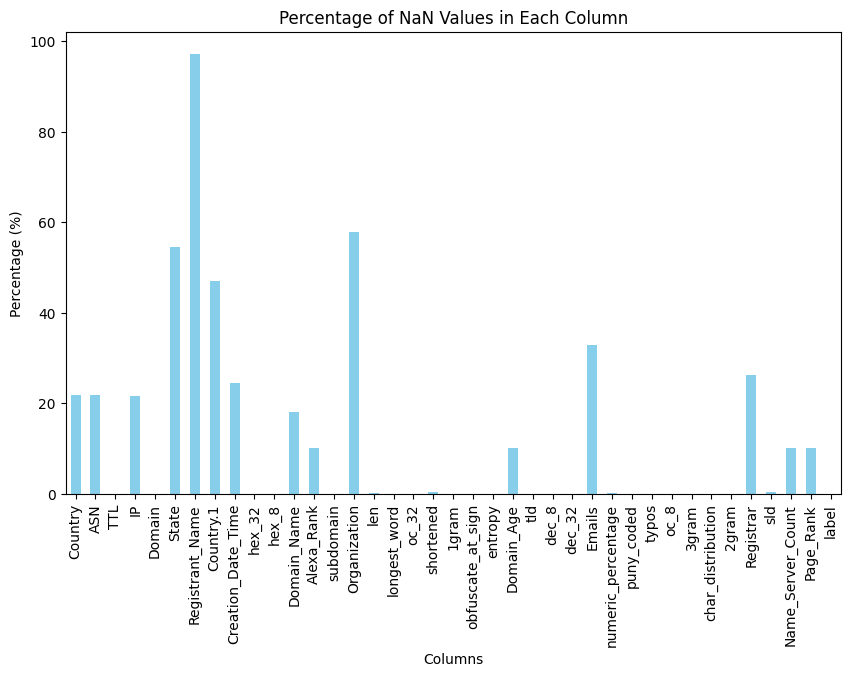

In [17]:
# Create a bar plot
plt.figure(figsize=(10, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

## Data Cleaning

In [24]:
df_concat.head(3).T

0  \
Country                                                            US   
ASN                                                           15169.0   
TTL                                                                46   
IP                                                      172.217.1.174   
Domain                                                 b'google.com.'   
State                                                              CA   
Registrant_Name                                                   NaN   
Country.1                                                          US   
Creation_Date_Time                                1997-09-15 04:00:00   
hex_32                                                              0   
hex_8                                                               0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                           0   
Organization                                               Google LLC   
len                                                                 7   
longest_word                                                   google   
oc_32                                                             0.0   
shortened                                                        -1.0   
1gram                                  ['g', 'o', 'o', 'g', 'l', 'e']   
obfuscate_at_sign                                                 0.0   
entropy                                            1.8348756474779464   
Domain_Age                                  8256 days 11:53:49.631067   
tld                                                               com   
dec_8                                                               0   
dec_32                                                              0   
Emails              ['abusecomplaints@markmonitor.com', 'whoisrequ...   
numeric_percentage                                                0.0   
puny_coded                                                          0   
typos                    [('google.com', 100), ('google.com.br', 95)]   
oc_8                                                                0   
3gram                                    ['goo', 'oog', 'ogl', 'gle']   
char_distribution   defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                  ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                            MarkMonitor inc.   
sld                                                            google   
Name_Server_Count                                                 8.0   
Page_Rank                                                        -1.0   
label                                                               0   

                                                                    1  \
Country                                                           NaN   
ASN                                                               NaN   
TTL                                                               299   
IP                                                                NaN   
Domain                                                 b'google.com.'   
State                                                              CA   
Registrant_Name                                                   NaN   
Country.1                                                          US   
Creation_Date_Time                                1997-09-15 04:00:00   
hex_32                                                              0   
hex_8                                                               0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                           0   
Organization                                        

In [25]:
# Drop columns with high number of nan values
# Set the threshold for missing data (75%)
threshold = 0.25 * len(df_concat)

# Drop columns with missing data exceeding the threshold
df_concat = df_concat.dropna(thresh=threshold, axis=1)

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'

In [27]:
# Convert 'Creation_Date_Time' to a proper date format. The errors parameter can be set to 'coerce,' 
# which forces any parsing errors to be set as NaT (Not a Timestamp).
df_concat['Creation_Date_Time'] = pd.to_datetime(df_concat['Creation_Date_Time'], errors='coerce')

In [28]:
#Split 'Creation_Date_Time' into seperate year and month columns
# Create 'Year' and 'Month' columns
df_concat['Year'] = df_concat['Creation_Date_Time'].dt.year
df_concat['Month'] = df_concat['Creation_Date_Time'].dt.month

In [29]:
# Use regex to extract the number of days from Domain_Age column
df_concat['Domain_Age'] = df_concat['Domain_Age'].str.extract(r'(\d+) days').astype(float)

In [30]:
# Drop datetime column
df_concat = df_concat.drop(columns=['Creation_Date_Time'])

In [31]:
df_concat.head(3).T

0  \
Country                                                            US   
ASN                                                           15169.0   
TTL                                                                46   
IP                                                      172.217.1.174   
Domain                                                 b'google.com.'   
State                                                              CA   
Country.1                                                          US   
hex_32                                                              0   
hex_8                                                               0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                           0   
Organization                                               Google LLC   
len                                                                 7   
longest_word                                                   google   
oc_32                                                             0.0   
shortened                                                        -1.0   
1gram                                  ['g', 'o', 'o', 'g', 'l', 'e']   
obfuscate_at_sign                                                 0.0   
entropy                                            1.8348756474779464   
Domain_Age                                                     8256.0   
tld                                                               com   
dec_8                                                               0   
dec_32                                                              0   
Emails              ['abusecomplaints@markmonitor.com', 'whoisrequ...   
numeric_percentage                                                0.0   
puny_coded                                                          0   
typos                    [('google.com', 100), ('google.com.br', 95)]   
oc_8                                                                0   
3gram                                    ['goo', 'oog', 'ogl', 'gle']   
char_distribution   defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                  ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                            MarkMonitor inc.   
sld                                                            google   
Name_Server_Count                                                 8.0   
Page_Rank                                                        -1.0   
label                                                               0   
Year                                                           1997.0   
Month                                                             9.0   

                                                                    1  \
Country                                                           NaN   
ASN                                                               NaN   
TTL                                                               299   
IP                                                                NaN   
Domain                                                 b'google.com.'   
State                                                              CA   
Country.1                                                          US   
hex_32                                                              0   
hex_8                                                               0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                           0   
Organization                                               Google LLC   
len                                                                 7   
longest_word                                        

In [32]:
# Determine which columns can be converted to numeric data type
numerical_columns = ['TTL','hex_32','hex_8', 'Alexa_Rank', 'subdomain', 'len', 'oc_32', 'shortened', 'entropy', 'obfuscate_at_sign', 'ASN', 
                     'dec_8', 'dec_32', 'numeric_percentage', 'puny_coded', 'oc_8', 'Name_Server_Count', 'Page_Rank', 'Year', 'Month', 'label', 'Domain_Age']

In [33]:
# Convert to numeric data type
df_concat[numerical_columns] = df_concat[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [34]:
# Determine which columns are categorical data type by dropping numeric columns
categorical_columns = df_concat.drop(columns=numerical_columns).columns

In [35]:
df_concat[numerical_columns]

TTL  hex_32  hex_8  Alexa_Rank  subdomain   len  oc_32  shortened  \
0        46.0     0.0    0.0         1.0        0.0   7.0    0.0       -1.0   
1       299.0     0.0    0.0         1.0        0.0   7.0    0.0       -1.0   
2        38.0     0.0    0.0         1.0        1.0  10.0    0.0       -1.0   
3       299.0     0.0    0.0         NaN        1.0  10.0    0.0       -1.0   
4        96.0     0.0    0.0         4.0        0.0   9.0    0.0       -1.0   
...       ...     ...    ...         ...        ...   ...    ...        ...   
4994  14399.0     0.0    0.0         NaN        0.0  17.0    0.0       -1.0   
4995   3599.0     0.0    0.0      3851.0        1.0  32.0    0.0       -1.0   
4996   3599.0     0.0    0.0      3851.0        1.0  32.0    0.0       -1.0   
4997   1799.0     0.0    0.0        -1.0        0.0  18.0    0.0       -1.0   
4998   1799.0     0.0    0.0   5004230.0        1.0  11.0    0.0       -1.0   

       entropy  obfuscate_at_sign  ...  dec_32  numeric_percentage  \
0     1.834876                0.0  ...     0.0            0.000000   
1     1.834876                0.0  ...     0.0            0.000000   
2     2.114247                0.0  ...     0.0            0.000000   
3     2.114247                0.0  ...     0.0            0.000000   
4     2.595489                0.0  ...     0.0            0.000000   
...        ...                ...  ...     ...                 ...   
4994  2.890279                0.0  ...     0.0            0.000000   
4995  3.808768                0.0  ...     0.0            7.894737   
4996  3.808768                0.0  ...     0.0            7.894737   
4997  3.340769                0.0  ...     0.0            0.000000   
4998  2.781301                0.0  ...     0.0            0.000000   

      puny_coded  oc_8  Name_Server_Count  Page_Rank    Year  Month  label  \
0            0.0   0.0                8.0       -1.0  1997.0    9.0      0   
1            0.0   0.0                8.0       -1.0  1997.0    9.0      0   
2            0.0   0.0                4.0       -1.0  1997.0    9.0      0   
3            0.0   0.0                NaN        NaN     NaN    NaN      0   
4            0.0   0.0                4.0       -1.0  1997.0    3.0      0   
...          ...   ...                ...        ...     ...    ...    ...   
4994         0.0   0.0                NaN        NaN     NaN    NaN      1   
4995         0.0   0.0                4.0       -1.0  2016.0    5.0      1   
4996         0.0   0.0                4.0       -1.0  2016.0    5.0      1   
4997         0.0   0.0                0.0       -1.0     NaN    NaN      1   
4998         0.0   0.0                0.0       -1.0     NaN    NaN      1   

      Domain_Age  
0         8256.0  
1         8256.0  
2         8256.0  
3            NaN  
4         8426.0  
...          ...  
4994         NaN  
4995      1440.0  
4996      1440.0  
4997         NaN  
4998         NaN  

[483590 rows x 22 columns]

In [36]:
df_concat[categorical_columns].T

0     \
Country                                                           US   
IP                                                     172.217.1.174   
Domain                                                b'google.com.'   
State                                                             CA   
Country.1                                                         US   
Domain_Name                             ['GOOGLE.COM', 'google.com']   
Organization                                              Google LLC   
longest_word                                                  google   
1gram                                 ['g', 'o', 'o', 'g', 'l', 'e']   
tld                                                              com   
Emails             ['abusecomplaints@markmonitor.com', 'whoisrequ...   
typos                   [('google.com', 100), ('google.com.br', 95)]   
3gram                                   ['goo', 'oog', 'ogl', 'gle']   
char_distribution  defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                 ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                           MarkMonitor inc.   
sld                                                           google   

                                                                1     \
Country                                                          NaN   
IP                                                               NaN   
Domain                                                b'google.com.'   
State                                                             CA   
Country.1                                                         US   
Domain_Name                             ['GOOGLE.COM', 'google.com']   
Organization                                              Google LLC   
longest_word                                                  google   
1gram                                 ['g', 'o', 'o', 'g', 'l', 'e']   
tld                                                              com   
Emails             ['abusecomplaints@markmonitor.com', 'whoisrequ...   
typos                   [('google.com', 100), ('google.com.br', 95)]   
3gram                                   ['goo', 'oog', 'ogl', 'gle']   
char_distribution  defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                 ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                           MarkMonitor inc.   
sld                                                           google   

                                                                2     \
Country                                                          NaN   
IP                                                               NaN   
Domain                                            b'www.google.com.'   
State                                                            NaN   
Country.1                                                        NaN   
Domain_Name                                               GOOGLE.COM   
Organization                                                     NaN   
longest_word                                                  google   
1gram                                 ['g', 'o', 'o', 'g', 'l', 'e']   
tld                                                              com   
Emails                               abusecomplaints@markmonitor.com   
typos                   [('google.com', 100), ('google.com.br', 95)]   
3gram                                   ['goo', 'oog', 'ogl', 'gle']   
char_distribution  defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...   
2gram                                 ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                           MarkMonitor Inc.   
sld                                                           google   

                                                                3     \
Country                                                           US   
IP                           

In [37]:
# Create summary of Nan and unique values counts for categorical data
data_summary(df_concat[categorical_columns])

nan_count  nan_percentage  Unique_val count  \
Country               105610            21.8               285   
IP                    104335            21.6            177855   
Domain                     0             0.0            313538   
State                 263453            54.5              5814   
Country.1             227474            47.0              1620   
Domain_Name            87007            18.0            195952   
Organization          279730            57.8             39735   
longest_word             129             0.0             34204   
1gram                     22             0.0            211753   
tld                        3             0.0             31786   
Emails                158504            32.8             44745   
typos                      0             0.0             30268   
3gram                      0             0.0            210746   
char_distribution          0             0.0            284881   
2gram                    175             0.0            229924   
Registrar             126965            26.3             17290   
sld                     1326             0.3            177014   

                   unique_percentage  Zero values count Data type  
Country                          0.1                  0    object  
IP                              36.8                  0    object  
Domain                          64.8                  0    object  
State                            1.2                  0    object  
Country.1                        0.3                  0    object  
Domain_Name                     40.5                  0    object  
Organization                     8.2                  0    object  
longest_word                     7.1                  0    object  
1gram                           43.8                  0    object  
tld                              6.6                  0    object  
Emails                           9.3                  0    object  
typos                            6.3                  0    object  
3gram                           43.6                  0    object  
char_distribution               58.9                  0    object  
2gram                           47.5                  0    object  
Registrar                        3.6                  0    object  
sld                             36.6                  0    object

In [38]:
# regex_pattern = "b'?(www.)?(.*?)\.'"
# df_concat['Domain'] = df_concat['Domain'].str.extract(regex_pattern)

In [39]:
# Most indexes are duplicated
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483590 entries, 0 to 4998
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             377980 non-null  object 
 1   ASN                 378035 non-null  float64
 2   TTL                 483566 non-null  float64
 3   IP                  379255 non-null  object 
 4   Domain              483590 non-null  object 
 5   State               220137 non-null  object 
 6   Country.1           256116 non-null  object 
 7   hex_32              483220 non-null  float64
 8   hex_8               483563 non-null  float64
 9   Domain_Name         396583 non-null  object 
 10  Alexa_Rank          434831 non-null  float64
 11  subdomain           483461 non-null  float64
 12  Organization        203860 non-null  object 
 13  len                 452572 non-null  float64
 14  longest_word        483461 non-null  object 
 15  oc_32               452816 non-null  floa

In [40]:
# Reset index
df_concat.reset_index(drop=True, inplace=True)

In [41]:
df_concat.T

0       \
Country                                                            US   
ASN                                                           15169.0   
TTL                                                              46.0   
IP                                                      172.217.1.174   
Domain                                                 b'google.com.'   
State                                                              CA   
Country.1                                                          US   
hex_32                                                            0.0   
hex_8                                                             0.0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                         0.0   
Organization                                               Google LLC   
len                                                               7.0   
longest_word                                                   google   
oc_32                                                             0.0   
shortened                                                        -1.0   
1gram                                  ['g', 'o', 'o', 'g', 'l', 'e']   
obfuscate_at_sign                                                 0.0   
entropy                                                      1.834876   
Domain_Age                                                     8256.0   
tld                                                               com   
dec_8                                                             0.0   
dec_32                                                            0.0   
Emails              ['abusecomplaints@markmonitor.com', 'whoisrequ...   
numeric_percentage                                                0.0   
puny_coded                                                        0.0   
typos                    [('google.com', 100), ('google.com.br', 95)]   
oc_8                                                              0.0   
3gram                                    ['goo', 'oog', 'ogl', 'gle']   
char_distribution   defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                  ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                            MarkMonitor inc.   
sld                                                            google   
Name_Server_Count                                                 8.0   
Page_Rank                                                        -1.0   
label                                                               0   
Year                                                           1997.0   
Month                                                             9.0   

                                                               1       \
Country                                                           NaN   
ASN                                                               NaN   
TTL                                                             299.0   
IP                                                                NaN   
Domain                                                 b'google.com.'   
State                                                              CA   
Country.1                                                          US   
hex_32                                                            0.0   
hex_8                                                             0.0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                         0.0   
Organization                                               Google LLC   
len                                                               7.0   
longest_word                                   

Check for infinite values

In [42]:
df_concat.describe()

ASN            TTL         hex_32     hex_8    Alexa_Rank  \
count  378035.000000  483566.000000  483220.000000  483563.0  4.348310e+05   
mean    36134.638266    4622.951086       0.000010       0.0  8.070208e+05   
std     53119.391007    6655.870855       0.003217       0.0  1.908852e+06   
min         3.000000       0.000000       0.000000       0.0 -1.000000e+00   
25%     13335.000000     299.000000       0.000000       0.0 -1.000000e+00   
50%     19551.000000     899.000000       0.000000       0.0  7.888500e+04   
75%     40034.000000    3888.750000       0.000000       0.0  5.114350e+05   
max    398246.000000  397224.000000       1.000000       0.0  1.091875e+07   

          subdomain            len     oc_32      shortened  \
count  4.834610e+05  452572.000000  452816.0  482102.000000   
mean   5.376280e+02      12.057628       inf      -0.935984   
std    4.951540e+04       4.978037       NaN       0.244934   
min   -1.000000e+00      -1.000000      -1.0      -1.000000   
25%    0.000000e+00       8.000000       0.0      -1.000000   
50%    0.000000e+00      11.000000       0.0      -1.000000   
75%    1.000000e+00      15.000000       0.0      -1.000000   
max    1.069806e+07     142.000000       inf       3.108098   

       obfuscate_at_sign  ...     dec_8         dec_32  numeric_percentage  \
count      452740.000000  ...  452701.0  483102.000000       451505.000000   
mean            0.001065  ...       0.0       0.002511            0.879707   
std             0.054596  ...       0.0       0.050046            4.246263   
min             0.000000  ...       0.0       0.000000            0.000000   
25%             0.000000  ...       0.0       0.000000            0.000000   
50%             0.000000  ...       0.0       0.000000            0.000000   
75%             0.000000  ...       0.0       0.000000            0.000000   
max             3.581015  ...       0.0       1.000000           72.727273   

          puny_coded      oc_8  Name_Server_Count      Page_Rank  \
count  483099.000000  451014.0       3.360820e+05  434720.000000   
mean        0.053130       0.0       1.487732e+53      -0.098797   
std         0.937139       0.0       8.624767e+55       1.883598   
min         0.000000       0.0      -1.000000e+00      -1.000000   
25%         0.000000       0.0       2.000000e+00      -1.000000   
50%         0.000000       0.0       2.000000e+00      -1.000000   
75%         0.000000       0.0       4.000000e+00      -1.000000   
max        62.500000       0.0       5.000000e+58      42.000000   

               label           Year          Month  
count  483590.000000  362665.000000  362665.000000  
mean        0.010292    2006.865876       6.334253  
std         0.100925       7.854269       3.447802  
min         0.000000    1985.000000       1.000000  
25%         0.000000    2000.000000       3.000000  
50%         0.000000    2006.000000       6.000000  
75%         0.000000    2014.000000       9.000000  
max         1.000000    2020.000000      12.000000  

[8 rows x 22 columns]

Remove inf values

In [43]:
df_concat = df_concat.replace([np.inf, -np.inf], np.nan)

In [44]:
df_concat.isin([np.inf, -np.inf]).any().any()

False

In [45]:
# Save the DataFrame to a pickle file
df_concat.to_pickle('Data/processed_data.pkl')

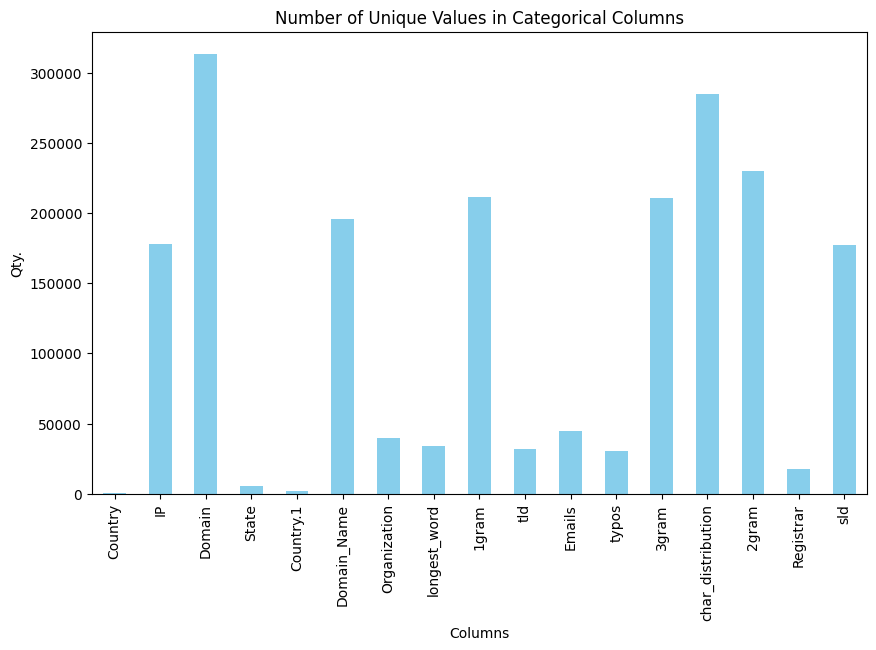

In [50]:
# Calculate the percentage of NaN values in each column
unique_percentage = (df_concat[categorical_columns].nunique())

# Create a bar plot
plt.figure(figsize=(10, 6))
unique_percentage.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Qty.')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()